In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4, 3)
plt.style.use("ggplot")

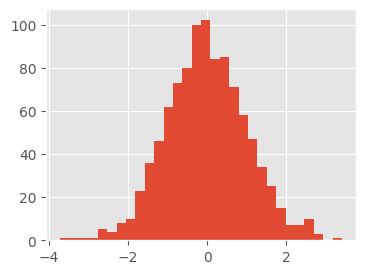

In [2]:
n = tfd.Normal(loc=0., scale=1.)
plt.hist(n.sample(1000), bins=30)
plt.show()

In [3]:
n.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9896782>

In [4]:
n.log_prob([1., 2., 3.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4189385, -2.9189386, -5.4189386], dtype=float32)>

In [5]:
n.log_prob([[1., 1.], [2., 1.], [1., 3.]])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-1.4189385, -1.4189385],
       [-2.9189386, -1.4189385],
       [-1.4189385, -5.4189386]], dtype=float32)>

In [6]:
n.log_survival_function([1., 3.])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.8410217, -6.607726 ], dtype=float32)>

In [7]:
nd = tfd.MultivariateNormalDiag(loc=[1., 10.], scale_diag=[1., 4.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [8]:
nd.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2.3372645, 8.941295 ], dtype=float32)>

In [9]:
nd.log_prob([1., 2.])

<tf.Tensor: shape=(), dtype=float32, numpy=-5.2241716>

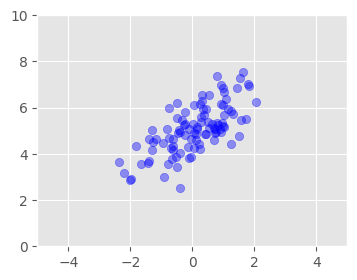

In [16]:
covariance_matrix = [[1., 7.], [.7, 1.]]
nd = tfd.MultivariateNormalTriL(
    loc=[0., 5], scale_tril=tf.linalg.cholesky(covariance_matrix))
data = nd.sample(100)
plt.scatter(data[:, 0], data[:, 1], color="blue", alpha=.4)
plt.axis([-5, 5, 0, 10])
plt.show()

In [17]:
data.shape

TensorShape([100, 2])

In [19]:
b3 = tfd.Bernoulli(probs = [.7, .3, .5])
samples = b3.sample(1000)
samples.shape

TensorShape([1000, 3])

In [21]:
import numpy as np
np.mean(samples[:, 1])

0.309

In [22]:
np.mean(samples[:, 0])

0.698

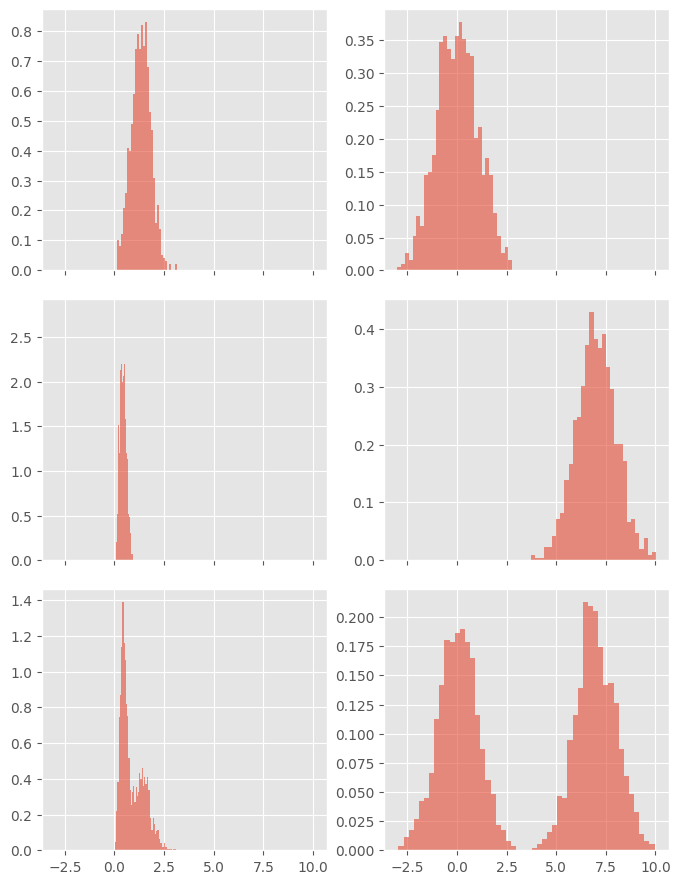

In [46]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(7, 9))
fig.tight_layout()

w1 = tfd.Weibull(3., 1.5)
data = w1.sample(1000)
axes[0, 0].hist(data, bins = 30, alpha = .6, density = True)

w2 = tfd.Weibull(3., 0.5)
data = w2.sample(1000)
axes[1, 0].hist(data, bins = 30, alpha = .6, density = True)

mix = tfd.Mixture(
    cat = tfd.Categorical(probs = [.5, .5]),
    components = [w1, w2]
)
data = mix.sample(2000)
axes[2, 0].hist(data, bins = 50, alpha = .6, density = True)

w1 = tfd.Normal(loc = 0., scale = 1.)
data = w1.sample(1000)
axes[0, 1].hist(data, bins = 30, alpha = .6, density = True)

w2 = tfd.Normal(loc = 7., scale = 1.)
data = w2.sample(1000)
axes[1, 1].hist(data, bins = 30, alpha = .6, density = True)

mix = tfd.Mixture(
    cat = tfd.Categorical(probs = [.5, .5]),
    components = [w1, w2]
)
data = mix.sample(2000)
axes[2, 1].hist(data, bins = 50, alpha = .6, density = True)

plt.show()

In [49]:
mix.sample((100, 2, 1)).shape

TensorShape([100, 2, 1])